# Compare Scenarios (100yr, 500yr, harvey - flood)

The following analysis compares the differnet possible floods and their impacts on the housholds, summing up the total damage (after housholds that can have adapted) for each scenrio (averaged over the defined model runs).

This assumes no interaction by the goverment agent, meaning no subsidies are given and the media risk perception is not influenced by the government. The later means that the media is approximated to give the households objective information on their risk of flooding (Imedia = 0.5), based on Haer et al. (2017).

In [20]:
from model import AdaptationModel
from mesa import batch_run
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Define parameters
number_of_households = 100 # numbers of houshold agents in model
number_of_steps = 80 # number of time steps in model, each representing 1/4 year
time_of_flooding = 70 # time step at which flooding occurs
number_of_iterations = 100 # number of times the model is run per parameter combination selcted from the below prensented parameter space

# parameter space
subsidie_level = 0 # subsidy level in USD
information_bias = 0 # Risk perception bias of government 

In [22]:
# Define the list of flood choices
flood_choices = ["100yr", "500yr", "harvey"]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame()

# Run the code for each flood choice
for flood_choice in flood_choices:
    params = {
    "seed": 123,
    "number_of_households": number_of_households,
    "flood_map_choice": flood_choice, 
    "network": "watts_strogatz", 
    "probability_of_network_connection": 0.4,
    "number_of_edges": 3,
    "number_of_nearest_neighbours": 5,
    "time_of_flooding": time_of_flooding,
    "subsidie_level": subsidie_level,
    "information_bias": information_bias
    }
    
    # Create the batch runner
    results = batch_run(
        AdaptationModel,
        parameters=params,
        iterations=number_of_iterations, # number of model runs for each combination of parameters
        max_steps=number_of_steps, # maximum number of steps for each model run
        number_processes=1, # number of processes to use
        data_collection_period = -1,
    )
    
    # Convert the results to a DataFrame and add the flood choice
    results_df_temp = pd.DataFrame(results)
    results_df_temp['flood_choice'] = flood_choice

    # Append the results to the results DataFrame
    results_df = pd.concat([results_df, results_df_temp])

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [23]:
# Reset the index of the results DataFrame
results_df = results_df.reset_index(drop=True)
results_df

,RunId,iteration,Step,seed,number_of_households,flood_map_choice,network,probability_of_network_connection,number_of_edges,number_of_nearest_neighbours,...,PriorRiskPerception,FloodDepthActual,FloodDamageActual,IsAdapted,AdaptedAt,FriendsCount,Location,Savings,IncomeCategory,flood_choice
0,0,0,80,123,100,100yr,watts_strogatz,0.4,3,5,...,0.833333,0.160246,32859.940379,False,NaN,4,POINT (290856.8488511502 3270308.7741234666),92120.304596,middle,100yr
1,0,0,80,123,100,100yr,watts_strogatz,0.4,3,5,...,0.833333,1.750790,74608.768255,False,NaN,4,POINT (251084.88326493173 3313885.59576818),52805.923950,middle,100yr
2,0,0,80,123,100,100yr,watts_strogatz,0.4,3,5,...,0.833333,0.000000,0.000000,False,NaN,3,POINT (241221.78439236758 3331227.534558984),18518.680168,low,100yr
3,0,0,80,123,100,100yr,watts_strogatz,0.4,3,5,...,0.833333,0.000000,0.000000,False,NaN,4,POINT (238777.3623598736 3317670.918589891),185165.139947,high,100yr
4,0,0,80,123,100,100yr,watts_strogatz,0.4,3,5,...,0.833333,0.000000,0.000000,False,NaN,5,POINT (283546.6112292806 3305989.250411988),73284.310732,high,100yr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99,99,80,123,100,harvey,watts_strogatz,0.4,3,5,...,0.833333,0.000000,0.000000,False,NaN,4,POINT (265109.2101545641 3322823.4365290944),191211.164232,high,harvey
29996,99,99,80,123,100,harvey,watts_strogatz,0.4,3,5,...,0.833333,0.000000,0.000000,False,NaN,4,POINT (214161.0178994825 3343141.0058114585),118223.809977,high,harvey
29997,99,99,80,123,100,harvey,watts_strogatz,0.4,3,5,...,0.833333,0.000000,0.000000,False,NaN,5,POINT (253309.92269476064 3335493.2980573685),7096.914949,low,harvey
29998,99,99,80,123,100,harvey,watts_strogatz,0.4,3,5,...,0.833333,0.000000,0.000000,False,NaN,4,POINT (282126.58796200546 3269726.924756505),186030.973269,high,harvey


In [24]:
selected_columns = results_df[['FloodDamageActual', "Step", "AgentID", "flood_map_choice", "Total_adapted_households"]]

# Group by "flood_map_choice", "Step" and "AgentID" and calculate the mean
step_agent_mean = selected_columns.groupby(['flood_map_choice', 'Step', 'AgentID']).mean()

# Group by "flood_map_choice" and "Step" and calculate the sum of "FloodDamageActual" and the mean of "Total_adapted_households"
step_sum = selected_columns.groupby(['flood_map_choice', 'Step']).agg({'FloodDamageActual': 'sum', 'Total_adapted_households': 'mean'})

# Reset the index to make "flood_map_choice" and "Step" columns again
step_sum = step_sum.reset_index()
step_sum


,flood_map_choice,Step,FloodDamageActual,Total_adapted_households
0,100yr,80,1.973556e+08,13.85
1,500yr,80,1.988139e+08,14.43
2,harvey,80,2.034933e+08,14.42


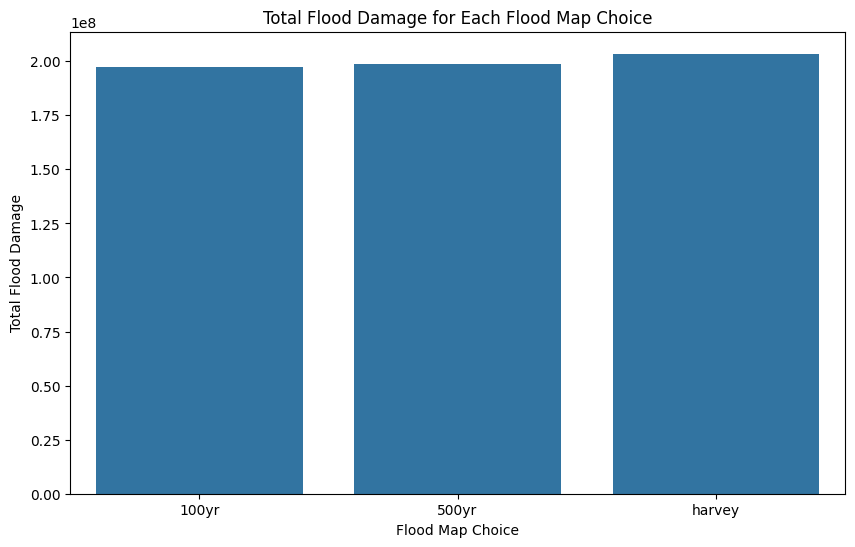

In [25]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='flood_map_choice', y='FloodDamageActual', data=step_sum)

# Add labels and title
plt.xlabel('Flood Map Choice')
plt.ylabel('Total Flood Damage')
plt.title('Total Flood Damage for Each Flood Map Choice')

# Show the plot
plt.show()

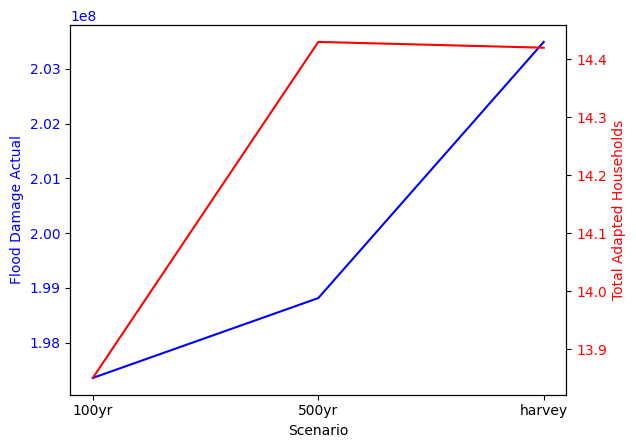

In [26]:
import matplotlib.pyplot as plt

# Create a new figure and a subplot
fig, ax1 = plt.subplots()

# Plot the sum of "FloodDamageActual" on the first y-axis
ax1.plot(step_sum['flood_map_choice'], step_sum['FloodDamageActual'], color='blue')
ax1.set_xlabel('Scenario')
ax1.set_ylabel('Flood Damage Actual', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the mean of "Total_adapted_households" on the second y-axis
ax2.plot(step_sum['flood_map_choice'], step_sum['Total_adapted_households'], color='red')
ax2.set_ylabel('Total Adapted Households', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Show the plot
plt.show()
